# Applied DS Excersize Sheet 1

## Question 1

### Question 1a
    What information is presented e.g. min, max, median for continuous variables?

Minimum returns the lowest value present in a column. Max returns the highest number in a column. Median returns the 50th percentile of the data. 25th and 75th perctile data. The standard deviation describes the spread of data. Any data beyond 3 sigma is considered an outlier. Number of null values for each feature.  

For categorical data we can count the number of unique categories. We can count the number of null values. 
 

    What are the limits of this information. 
    e.g. can we infer the presence of outliers? 
    Can we draw any conclusion on the type of distribution?

The minimum and maximum are strongly impacted by outliers but do not give you any information about the underlying data. If data is skewed then the median can be strongly affected. If there are underlying distributions or several combined distributions in the data then these summary values are not useful. 


    For categorical data, what properties should it have to be informative?
    e.g. do constant (near-constant) features carry any information?


Constant features with large standard eviation contain little data and may need to be combined with other parameters to be informative. Categorical data ideally produces clusters of data 

### Question 1b

    Discuss visualisation approaches combined with standardisation (Z transforms).



    Do extreme outliers influence the identification of outliers, using a Z transformation (e.g. through , ).



    For categorical features, how do we link the frequency of entries to the “usefulness” of a feature?


### Question 1c

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:


fea_1 = np.random.normal(50, 10, 200)
fea_2 = fea_1 * 2 + np.random.normal(0, 5, 200)

# Map fea_1 values to "lo", "me", or "hi"
bins = [-np.inf, 45, 55, np.inf]
labels = ["lo", "me", "hi"]
fea_3 = pd.cut(fea_1, bins=bins, labels=labels)

data = pd.DataFrame({'fea_1': fea_1, 'fea_2': fea_2, 'fea_3': fea_3})

# Introduce missing values in feature 1.
missing_indices = np.random.choice(200, 40, replace=False)
data.loc[missing_indices, 'fea_1'] = np.nan

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   fea_1   160 non-null    float64 
 1   fea_2   200 non-null    float64 
 2   fea_3   200 non-null    category
dtypes: category(1), float64(2)
memory usage: 3.6 KB


In [5]:
data.head()

,fea_1,fea_2,fea_3
0,42.254017,83.542502,lo
1,NaN,90.783100,me
2,60.538221,121.535234,hi
3,56.000513,112.459196,hi
4,42.454265,85.905481,lo


In [6]:
data.describe()

,fea_1,fea_2
count,160.000000,200.000000
mean,50.098442,100.283980
std,9.851554,20.937188
min,27.413205,52.792058
25%,43.024402,85.387374
50%,50.633163,100.717496
75%,57.350791,115.748411
max,72.861659,153.874540


In [7]:
Q1_UniqueValuesdata = data["fea_3"].unique()
data["fea_3"].value_counts()

fea_3
me    69
hi    68
lo    63
Name: count, dtype: int64

In [8]:
data.isna().sum()

fea_1    40
fea_2     0
fea_3     0
dtype: int64

c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil

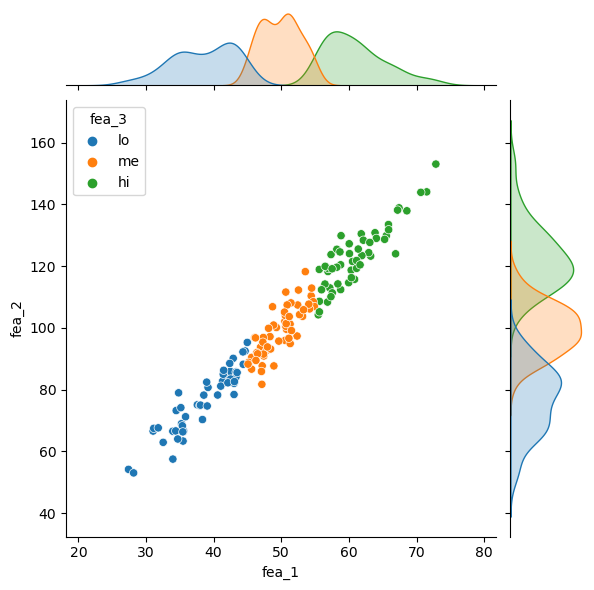

In [9]:
sns.jointplot(data=data, 
                x="fea_1", 
                y="fea_2", 
                hue="fea_3")

In [10]:
# Find indexes of null values

null_indexes = data[data["fea_1"].isnull()].index.tolist()
print(null_indexes)

[1, 5, 8, 16, 20, 25, 27, 36, 42, 67, 78, 93, 96, 105, 110, 115, 118, 123, 125, 137, 138, 140, 144, 148, 149, 150, 157, 159, 160, 163, 164, 168, 174, 175, 183, 184, 185, 188, 191, 196]


In [11]:
# I am loosing the index


# Value based imputation
def print_extra_line(variable):
    [print(i) for i in variable]

data_by_category = {
    feature: sub_df[["fea_1", "fea_2"]]
    for feature, sub_df in data.groupby("fea_3")
}
print(data_by_category.keys())
print_extra_line([i.describe(include="all") for i in data_by_category.values()])

dict_keys(['lo', 'me', 'hi'])
           fea_1      fea_2
count  49.000000  63.000000
mean   38.473499  76.857857
std     4.610930  10.686377
min    27.413205  52.792058
25%    35.152867  67.937269
50%    38.975599  78.412474
75%    42.514282  84.496690
max    44.975442  95.295239
           fea_1       fea_2
count  57.000000   69.000000
mean   49.845272   99.592387
std     2.804059    7.766526
min    45.087068   81.713909
25%    47.347618   93.827560
50%    50.537064   99.864686
75%    51.507251  105.125446
max    54.894812  118.236279
           fea_1       fea_2
count  54.000000   68.000000
mean   60.914237  122.689358
std     4.404419   10.445589
min    55.471068  104.239880
25%    57.350791  115.330706
50%    60.213913  120.451010
75%    63.190111  128.786472
max    72.861659  153.874540


C:\Users\William\AppData\Local\Temp\ipykernel_25384\2803897263.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for feature, sub_df in data.groupby("fea_3")


In [12]:
# Value baed impute
from sklearn.impute import SimpleImputer

def SimpleImputerTrainer(data, strategy="median"):
    columns = data.columns
    imputer_mean = SimpleImputer(strategy=strategy)
    imputer_mean.fit(data) 
    return pd.DataFrame(imputer_mean.transform(data), columns=columns)

data_by_category_imputed = {feature: SimpleImputerTrainer(sub_data) for feature, sub_data in data_by_category.items()}

for feature, sub_data in data_by_category_imputed.items():
    sub_data["fea_3"]=feature

data_imputed = pd.concat(data_by_category_imputed.values())

In [13]:
data_value_imputed_null_values = data_imputed.iloc[null_indexes]

c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil

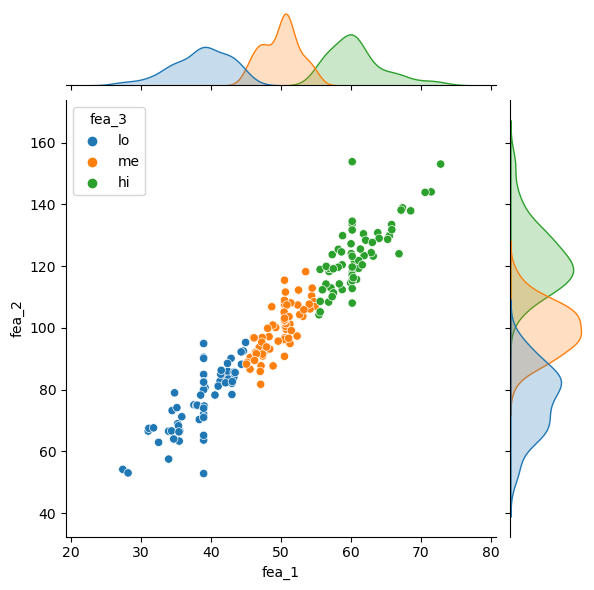

In [14]:
sns.jointplot(data=data_imputed, x="fea_1", y="fea_2", hue="fea_3")


In [15]:
# sns.jointplot(data=data_value_imputed_null_values, x="fea_1", y="fea_2", hue="fea_3")

In [16]:
from sklearn.linear_model import LinearRegression

null_data = data.iloc[null_indexes]
data_removed_null = data.drop(null_indexes)

linear_fit = LinearRegression().fit(
    data_removed_null["fea_1"].to_numpy().reshape(-1,1), 
    data_removed_null["fea_2"].to_numpy())

null_data["fea_1"] = (null_data["fea_2"] - linear_fit.intercept_)/linear_fit.coef_

C:\Users\William\AppData\Local\Temp\ipykernel_25384\307884109.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_data["fea_1"] = (null_data["fea_2"] - linear_fit.intercept_)/linear_fit.coef_


c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil

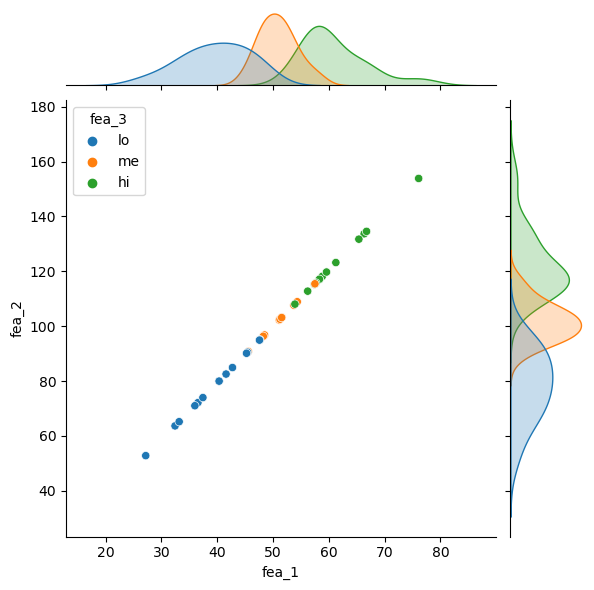

In [17]:
sns.jointplot(data=null_data, 
              x="fea_1", 
              y="fea_2", 
              hue="fea_3")

## Question 2

c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil

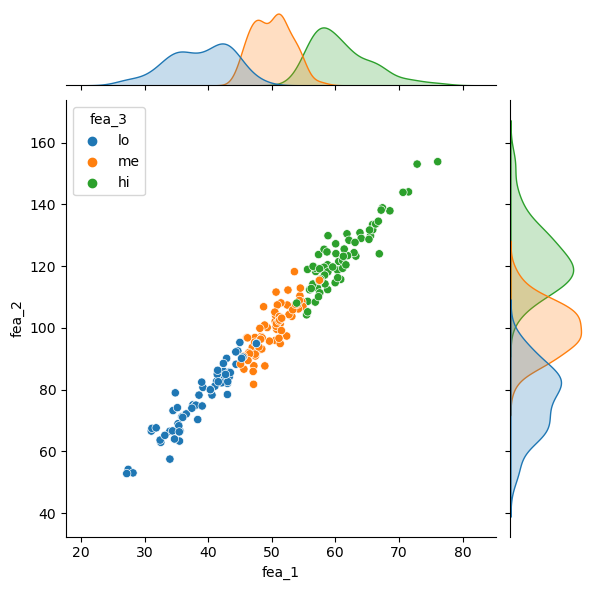

In [18]:
sns.jointplot(data=pd.concat([data_removed_null, null_data]),
              x="fea_1", 
              y="fea_2", 
              hue="fea_3")

## Question 2

In [19]:
preProcessing2_raw = pd.read_csv('./Data/PreProcessing_ex2.csv')

In [20]:
preProcessing2_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  200 non-null    float64
 1   feature_2  200 non-null    float64
 2   feature_3  200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [21]:
preProcessing2_raw.head()

,feature_1,feature_2,feature_3
0,63.709584,117.414523,Red
1,44.353018,90.374923,Red
2,53.631284,113.119194,Blue
3,56.328626,122.954948,Yellow
4,100.000000,250.000000,Yellow


In [22]:
preProcessing2_raw.describe()

,feature_1,feature_2
count,200.000000,200.000000
mean,50.004500,100.334766
std,11.951209,25.207456
min,3.000000,0.000000
25%,43.797476,87.271306
50%,49.727313,98.673782
75%,56.336346,113.618801
max,120.000000,250.000000


In [23]:
preProcessing2_raw["feature_3"].value_counts()

feature_3
Blue      88
Red       56
Yellow    56
Name: count, dtype: int64

c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil

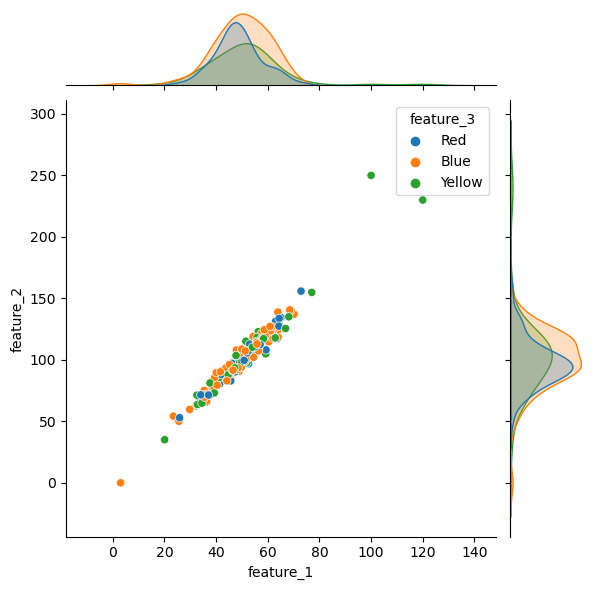

In [24]:
sns.jointplot(data=preProcessing2_raw,
              x="feature_1", 
              y="feature_2", 
              hue="feature_3")

c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil

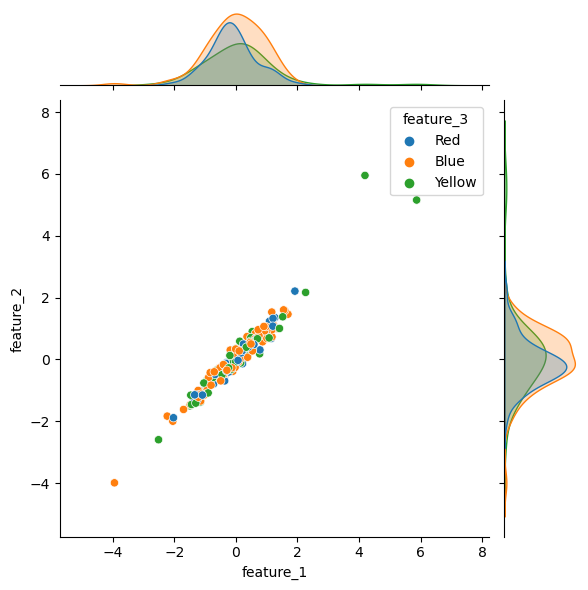

In [25]:
from scipy.stats import zscore

preProcessing2_scaled = preProcessing2_raw[["feature_1", "feature_2"]].apply(zscore)
preProcessing2_scaled["feature_3"] = preProcessing2_raw["feature_3"]

sns.jointplot(data=preProcessing2_scaled,
              x="feature_1", 
              y="feature_2", 
              hue="feature_3")

Zscore is skewed becuase mean is strongly affected by outliers

## Question 3

In [26]:
linear_equation = lambda x, a, b: a*x+b
quadratic_equation = lambda x, a, b, c: a*x**2+b*x+c
polynomial_equation = lambda x, a, b, c, d: a*x**3 + b*x**2 + c*x + d
log_equation = lambda x, a, b : np.log(a*x + b) 
exp_equation = lambda x, a, b: a*np.exp(b*x)

In [27]:
my_x = np.arange(1, 101)

linear_params_true = [2, 1]
quadratic_params_true = [1, 5, 9]
polynomial_params_true = [1, 5, -3, 11]
log_params_true = [1, 1]
exp_params_true = [1, 0.1]

my_y_linear     = linear_equation(my_x, *linear_params_true)
my_y_quadratic  = quadratic_equation(my_x, *quadratic_params_true)
my_y_polynomial = polynomial_equation(my_x, *polynomial_params_true)
my_y_log        = log_equation(my_x, *log_params_true)
my_y_exp        = exp_equation(my_x, *exp_params_true)

In [28]:
from scipy.optimize import curve_fit

linear_popt, linear_pcov = curve_fit(linear_equation, my_x, my_y_linear)
quadratic_popt, quadratic_pcov = curve_fit(quadratic_equation, my_x, my_y_quadratic)
polynomial_popt, polynomial_pcov = curve_fit(polynomial_equation, my_x, my_y_polynomial)
log_popt, log_pcov = curve_fit(log_equation, my_x, my_y_log)
exp_popt, exp_pcov = curve_fit(exp_equation, my_x, my_y_exp)

In [29]:
linear_prediction = linear_equation(my_x, *linear_popt)
quadratic_prediction = quadratic_equation(my_x, *quadratic_popt)
polynomial_prediction = polynomial_equation(my_x, *polynomial_popt)
log_prediciton = log_equation(my_x, *log_popt)
exp_prediction = exp_equation(my_x, *exp_popt)

In [30]:
def paramsFormatting(name, expected, estimated):
    output = f"Estimated values for {name}\n"
    output+= "    True, Pred\n"
    for i, value in enumerate(expected):
        output += f"    {value:.1f}, {estimated[i]:.2f}\n"
    return output

In [31]:
print(paramsFormatting("linear", linear_params_true, linear_popt))
print(paramsFormatting("quadtratic", quadratic_params_true, quadratic_popt))
print(paramsFormatting("polynomial", polynomial_params_true, polynomial_popt))
print(paramsFormatting("log", log_params_true, log_popt))
print(paramsFormatting("exp", exp_params_true, exp_popt))

Estimated values for linear
    True, Pred
    2.0, 2.00
    1.0, 1.00

Estimated values for quadtratic
    True, Pred
    1.0, 1.00
    5.0, 5.00
    9.0, 9.00

Estimated values for polynomial
    True, Pred
    1.0, 1.00
    5.0, 5.00
    -3.0, -3.00
    11.0, 11.00

Estimated values for log
    True, Pred
    1.0, 1.00
    1.0, 1.00

Estimated values for exp
    True, Pred
    1.0, -0.00
    0.1, 1.00



In [32]:
def MSE(predicted_observed, predicted_prediction):
    sumOfSquares = lambda predicted_observed, predicted_prediction: (predicted_observed - predicted_prediction)**2
    return sumOfSquares(predicted_observed, predicted_prediction).sum() / len(predicted_observed)

In [33]:
print(MSE(my_y_linear, linear_prediction))


0.0


In [34]:
from sklearn.model_selection import train_test_split

# train_data, test_data = train_test_split(
#     data, 
#     test_size=0.2, 
#     stratify=data['y'], 
#     random_state=42
# )

## Question 3

regression_input_raw = pd.read_csv('./Data/regression_input.csv')

In [35]:
regression_input_raw = pd.read_csv('./Data/regression_input.csv')
regression_input_raw = regression_input_raw.reindex(columns=["pred1", "pred2", "pred3", "pred4", "y"])

In [36]:
regression_input_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pred1   11 non-null     int64  
 1   pred2   11 non-null     int64  
 2   pred3   11 non-null     float64
 3   pred4   11 non-null     int64  
 4   y       11 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 568.0 bytes


In [37]:
regression_input_raw.head()

,pred1,pred2,pred3,pred4,y
0,0,1,0.00,-5,0
1,1,-3,1.58,48,10
2,6,5,1.82,194,20
3,15,15,1.97,443,30
4,18,22,2.09,798,40


In [38]:
regression_input_raw.describe()

,pred1,pred2,pred3,pred4,y
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,22.818182,22.454545,1.962727,1746.181818,50.000000
std,16.533712,16.372927,0.709508,1722.060848,33.166248
min,0.000000,-3.000000,0.000000,-5.000000,0.000000
25%,10.500000,10.000000,1.895000,318.500000,25.000000
50%,24.000000,27.000000,2.180000,1246.000000,50.000000
75%,35.000000,32.500000,2.365000,2821.000000,75.000000
max,49.000000,49.000000,2.510000,4995.000000,100.000000


c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil

c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\William\Documents\CambridgeUniversity\MPhil

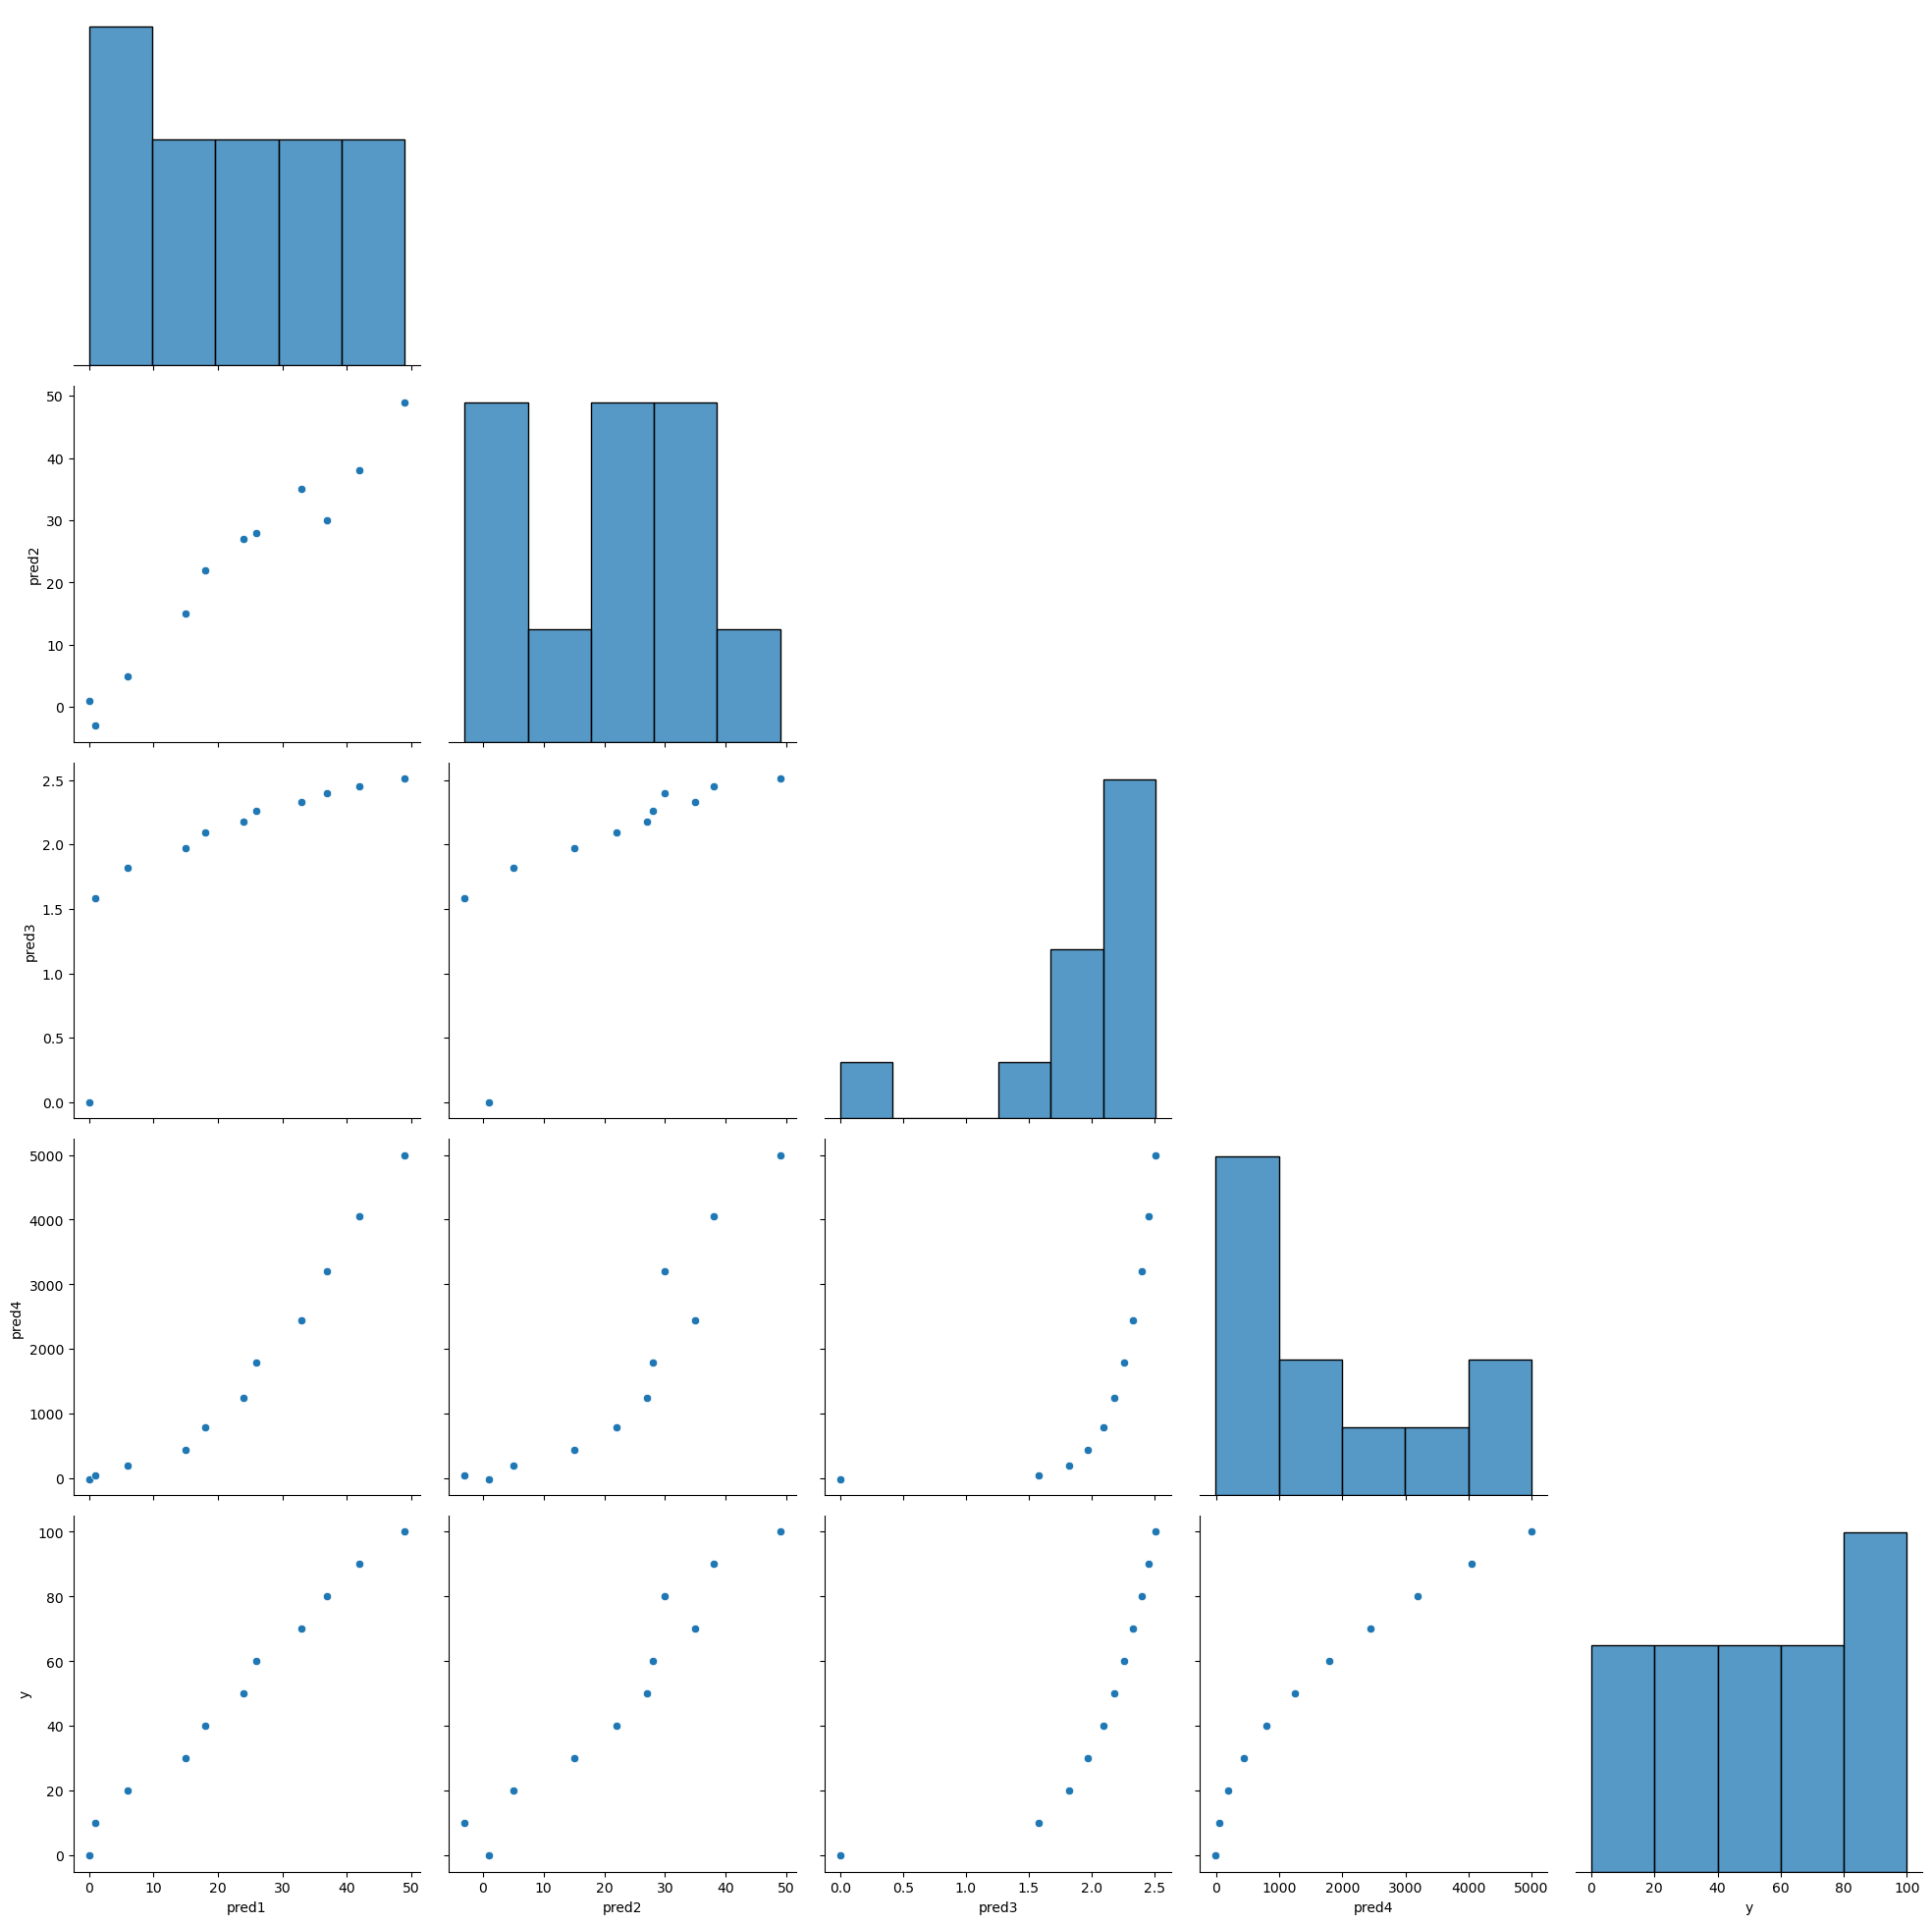

In [39]:
# sns.pairplot(regression_input_raw) 

# sns.pairplot(data) 

g = sns.PairGrid(regression_input_raw, 
                 diag_sharey = False, 
                 corner = True,
                 aspect=1.0,
                 height=4,
                )
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)

All variables are corrolated with an underlying structure with the output value. 

In [40]:
import statsmodels.api as sm

model = sm.OLS(
    regression_input_raw["y"], 
    regression_input_raw[["pred1", "pred2", "pred3", "pred4"]]
).fit()

predictions = model.predict(regression_input_raw[["pred1", "pred2", "pred3", "pred4"]])

In [41]:
model.summary()

c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              1622.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                    1.85e-10
Time:                        11:30:16   Log-Likelihood:                         -22.909
No. Observations:                  11   AIC:                                      53.82
Df Residuals:                       7   BIC:                                      55.41
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pred1          1.6268      0.524      3.103      0.017       0.387       2.867
pred2         -0.1389      0.294     -0.473      0.650      -0.833       0.555
pred3          5.2166      1.465      3.560      0.009       1.752       8.682
pred4          0.0033      0.003      1.316      0.230      -0.003       0.009
==============================================================================
Omnibus:                        1.741   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                0.212
Skew:                          -0.272   Prob(JB):                        0.899
Kurtosis:                       3.410   Cond. No.                     5.00e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Coeffiencts of `pred1` and `pred3` are large with a P value far away from 0.

The R^2 value is very high suggesting a good fit for the data.  

Forward selection would include selecting linear regressors for `pred1` and `pred 3`

In [42]:
# Non linear functions
# predictor_function = lambda x, a, b: a * np.log(b/100*x)
# linear_popt, linear_pcov = curve_fit(
#     predictor_function, 
#     regression_input_raw["pred4"], 
#     regression_input_raw["y"],
#     p0=[50, 10]
# )

from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score

huber = HuberRegressor().fit(
    regression_input_raw[["pred1", "pred2", "pred3", "pred4"]],
    regression_input_raw["y"]
)

y_pred = huber.predict(regression_input_raw[["pred1", "pred2", "pred3", "pred4"]])


c:\Users\William\Documents\CambridgeUniversity\MPhil-DIS\AppliedDS\Excersize1\.conda\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [44]:

r2_score(
    regression_input_raw["y"],
    y_pred
)

0.9955281192191047